<div align='center'>
    <h1>AutoML Tutorial</h1>
    <img src='https://github.com/vopani/fortyone/blob/main/images/automl_banner_530_x_455.png?raw=true'>
</div>

**Auto**mated **M**achine **L**earning (**AutoML**) has become widely adopted for building, experimenting and productionizing various types of machine learning models across business use-cases.

There are different open source solutions available and this notebook explores a simple baseline solution for some of them on the [Kaggle TPS (July 2021) competition](https://www.kaggle.com/c/tabular-playground-series-jul-2021).

* [AutoGluon](#AutoGluon)
* [Auto-Sklearn](#Auto-Sklearn)
* [FLAML](#FLAML)
* [H2O AutoML](#H2O-AutoML)
* [LightAutoML](#LightAutoML)
* [MLJAR](#MLJAR)
* [TPOT](#TPOT)

In [ ]:
## upgrade packages
!python3 -m pip install -q datatable --upgrade

In [ ]:
## define configuration
PATH_TRAIN = '../input/tabular-playground-series-jul-2021/train.csv'
PATH_TEST = '../input/tabular-playground-series-jul-2021/test.csv'

PATH_AUTOGLUON_SUBMISSION = 'submission_autogluon.csv'
PATH_AUTOSKLEARN_SUBMISSION = 'submission_autosklearn.csv'
PATH_FLAML_SUBMISSION = 'submission_flaml.csv'
PATH_H2OAML_SUBMISSION = 'submission_h2oaml.csv'
PATH_LAML_SUBMISSION = 'submission_laml.csv'
PATH_MLJAR_SUBMISSION = 'submission_mljar.csv'
PATH_TPOT_SUBMISSION = 'submission_tpot.csv'

In [ ]:
## prepare data
import gc
import os
import shutil
import datatable as dt
from pathlib import Path

train = dt.fread(PATH_TRAIN)
test = dt.fread(PATH_TEST)

target_carbon_monoxide = train['target_carbon_monoxide'].to_numpy().ravel()
target_benzene = train[:, 'target_benzene'].to_numpy().ravel()
target_nitrogen_oxides = train[:, 'target_nitrogen_oxides'].to_numpy().ravel()

del train[:, ['date_time', 'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']]
test_date_time = test[:, 'date_time']
test = test[:, train.names]

## AutoGluon
<img src='https://user-images.githubusercontent.com/16392542/77208906-224aa500-6aba-11ea-96bd-e81806074030.png' width='250px'>

[AutoGluon](https://auto.gluon.ai/stable/index.html) is an automl library open sourced by [Amazon](http://amazon.com/aws)

In [ ]:
## install packages
!python3 -m pip install -q "mxnet<2.0.0"
!python3 -m pip install -q autogluon
!python3 -m pip install -q graphviz --upgrade

In [ ]:
## import packages
from autogluon.tabular import TabularPredictor

In [ ]:
## run model for carbon monoxide
train['target'] = dt.Frame(target_carbon_monoxide)

autogluon_carbon_monoxide = TabularPredictor(
    label='target'
)

autogluon_carbon_monoxide.fit(train_data=train.to_pandas(), time_limit=180)

del train['target']

In [ ]:
## check leaderboard for carbon monoxide
autogluon_carbon_monoxide.leaderboard()

In [ ]:
## run model for benzene
train['target'] = dt.Frame(target_benzene)

autogluon_benzene = TabularPredictor(
    label='target'
)

autogluon_benzene.fit(train_data=train.to_pandas(), time_limit=180)

del train['target']

In [ ]:
## check leaderboard for benzene
autogluon_benzene.leaderboard()

In [ ]:
## run model for nitrogen oxides
train['target'] = dt.Frame(target_nitrogen_oxides)

autogluon_nitrogen_oxides = TabularPredictor(
    label='target'
)

autogluon_nitrogen_oxides.fit(train_data=train.to_pandas(), time_limit=180)

del train['target']

In [ ]:
## check leaderboard for nitrogen oxides
autogluon_nitrogen_oxides.leaderboard()

In [ ]:
## generate predictions
preds_autogluon_carbon_monoxide = dt.Frame(autogluon_carbon_monoxide.predict(test.to_pandas()))
preds_autogluon_benzene = dt.Frame(autogluon_benzene.predict(test.to_pandas()))
preds_autogluon_nitrogen_oxides = dt.Frame(autogluon_nitrogen_oxides.predict(test.to_pandas()))

In [ ]:
## create submission
submission = dt.Frame(
    date_time=test_date_time,
    target_carbon_monoxide=preds_autogluon_carbon_monoxide,
    target_benzene=preds_autogluon_benzene,
    target_nitrogen_oxides=preds_autogluon_nitrogen_oxides
)

submission.head()

In [ ]:
## save submission
submission.to_csv(PATH_AUTOGLUON_SUBMISSION)

In [ ]:
## clear memory
shutil.rmtree('AutogluonModels')

del autogluon_carbon_monoxide
del autogluon_benzene
del autogluon_nitrogen_oxides

gc.collect()

This is just a baseline submission over which a lot of improvements can be made. You can read more about AutoGluon's workflow, settings, hyperparameters, optimizations and more here:

* [Documentation of AutoGluon](https://auto.gluon.ai/stable/index.html)

## Auto-Sklearn
[auto-sklearn](https://automl.github.io/auto-sklearn) is an automated machine learning toolkit and a drop-in replacement for a scikit-learn estimator

In [ ]:
## install packages
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 python3 -m pip install -q
!python3 -m pip install -q auto-sklearn

In [ ]:
## import packages
from autosklearn.regression import AutoSklearnRegressor
from autosklearn.metrics import mean_squared_log_error

In [ ]:
## run model for carbon monoxide
autosklearn_carbon_monoxide = AutoSklearnRegressor(
    time_left_for_this_task=180,
    metric=mean_squared_log_error,
    scoring_functions=[mean_squared_log_error]
)

autosklearn_carbon_monoxide.fit(X=train.to_pandas(), y=target_carbon_monoxide, dataset_name='tps_jul_2021_carbon_monoxide')

In [ ]:
## check statistics for carbon monoxide
print(autosklearn_carbon_monoxide.sprint_statistics())

In [ ]:
## run model for benzene
autosklearn_benzene = AutoSklearnRegressor(
    time_left_for_this_task=180,
    metric=mean_squared_log_error,
    scoring_functions=[mean_squared_log_error]
)

autosklearn_benzene.fit(X=train.to_pandas(), y=target_benzene, dataset_name='tps_jul_2021_benzene')

In [ ]:
## check statistics for benzene
print(autosklearn_benzene.sprint_statistics())

In [ ]:
## run model for nitrogen oxides
autosklearn_nitrogen_oxides = AutoSklearnRegressor(
    time_left_for_this_task=180,
    metric=mean_squared_log_error,
    scoring_functions=[mean_squared_log_error]
)

autosklearn_nitrogen_oxides.fit(X=train.to_pandas(), y=target_nitrogen_oxides, dataset_name='tps_jul_2021_nitrogen_oxides')

In [ ]:
## check statistics for nitrogen oxides
print(autosklearn_nitrogen_oxides.sprint_statistics())

In [ ]:
## generate predictions
preds_autosklearn_carbon_monoxide = dt.Frame(autosklearn_carbon_monoxide.predict(test.to_pandas()))
preds_autosklearn_benzene = dt.Frame(autosklearn_benzene.predict(test.to_pandas()))
preds_autosklearn_nitrogen_oxides = dt.Frame(autosklearn_nitrogen_oxides.predict(test.to_pandas()))

In [ ]:
## create submission
submission = dt.Frame(
    date_time=test_date_time,
    target_carbon_monoxide=preds_autosklearn_carbon_monoxide,
    target_benzene=preds_autosklearn_benzene,
    target_nitrogen_oxides=preds_autosklearn_nitrogen_oxides
)

submission.head()

In [ ]:
## save submission
submission.to_csv(PATH_AUTOSKLEARN_SUBMISSION)

In [ ]:
## clear memory
del autosklearn_carbon_monoxide
del autosklearn_benzene
del autosklearn_nitrogen_oxides

gc.collect()

This is just a baseline submission over which a lot of improvements can be made. You can read more about Auto-Sklearn's workflow, settings, hyperparameters, optimizations and more here:

* [Documentation of auto-sklearn](https://automl.github.io/auto-sklearn)
* [Deep dive of auto-sklearn](https://github.com/vopani/fortyone#automl-series-)

## FLAML
<img src='https://github.com/microsoft/FLAML/raw/main/docs/images/FLAML.png' width='150px'>

[FLAML](https://microsoft.github.io/FLAML) is a fast and light automl library open sourced by [Microsoft](https://opensource.microsoft.com)

In [ ]:
## install packages
!python3 -m pip install -q flaml
!python3 -m pip install -q graphviz --upgrade

In [ ]:
## import packages
from flaml import AutoML

In [ ]:
## run model for carbon monoxide
flaml_carbon_monoxide = AutoML()

flaml_carbon_monoxide.fit(X_train=train.to_pandas(), y_train=target_carbon_monoxide, time_budget=180, metric='mse')

In [ ]:
## run model for benzene
flaml_benzene = AutoML()

flaml_benzene.fit(X_train=train.to_pandas(), y_train=target_benzene, time_budget=180, metric='mse')

In [ ]:
## run model for nitrogen oxides
flaml_nitrogen_oxides = AutoML()

flaml_nitrogen_oxides.fit(X_train=train.to_pandas(), y_train=target_nitrogen_oxides, time_budget=180, metric='mse')

In [ ]:
## generate predictions
preds_flaml_carbon_monoxide = dt.Frame(flaml_carbon_monoxide.predict(test.to_pandas()))
preds_flaml_benzene = dt.Frame(flaml_benzene.predict(test.to_pandas()))
preds_flaml_nitrogen_oxides = dt.Frame(flaml_nitrogen_oxides.predict(test.to_pandas()))

In [ ]:
## create submission
submission = dt.Frame(
    date_time=test_date_time,
    target_carbon_monoxide=preds_flaml_carbon_monoxide,
    target_benzene=preds_flaml_benzene,
    target_nitrogen_oxides=preds_flaml_nitrogen_oxides
)

submission.head()

In [ ]:
## save submission
submission.to_csv(PATH_FLAML_SUBMISSION)

In [ ]:
## clear memory
if Path('catboost_info').exists():
    shutil.rmtree('catboost_info')

os.remove('default.log')

del flaml_carbon_monoxide
del flaml_benzene
del flaml_nitrogen_oxides

gc.collect()

This is just a baseline submission over which a lot of improvements can be made. You can read more about FLAML's workflow, settings, hyperparameters, optimizations and more here:

* [Documentation of FLAML](https://microsoft.github.io/FLAML)

## H2O AutoML
<img src='https://docs.h2o.ai/h2o/latest-stable/h2o-docs/_images/h2o-automl-logo.jpg' width='150px'>

[H2O AutoML](https://www.h2o.ai/products/h2o-automl) is an automated machine learning library open sourced by [H2O.ai](https://h2o.ai)

In [ ]:
## import packages
import h2o
from h2o.automl import H2OAutoML

In [ ]:
## prepare data
h2o.init()

h2o_train = h2o.import_file(PATH_TRAIN)
h2o_test = h2o.import_file(PATH_TEST)

In [ ]:
## run model for carbon monoxide
features = [x for x in h2o_train.columns if x not in ['date_time', 'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']]

h2oaml_carbon_monoxide = H2OAutoML(
    max_runtime_secs=180,
    stopping_metric='RMSLE',
    sort_metric='RMSLE'
)

h2oaml_carbon_monoxide.train(x=features, y='target_carbon_monoxide', training_frame=h2o_train)

In [ ]:
## check leaderboard for carbon monoxide
h2oaml_carbon_monoxide.leaderboard

In [ ]:
## run model for carbon benzene
features = [x for x in h2o_train.columns if x not in ['date_time', 'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']]

h2oaml_benzene = H2OAutoML(
    max_runtime_secs=180,
    stopping_metric='RMSLE',
    sort_metric='RMSLE'
)

h2oaml_benzene.train(x=features, y='target_benzene', training_frame=h2o_train)

In [ ]:
## check leaderboard for benzene
h2oaml_benzene.leaderboard

In [ ]:
## run model for nitrogen oxides
features = [x for x in h2o_train.columns if x not in ['date_time', 'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']]

h2oaml_nitrogen_oxides = H2OAutoML(
    max_runtime_secs=180,
    stopping_metric='RMSLE',
    sort_metric='RMSLE'
)

h2oaml_nitrogen_oxides.train(x=features, y='target_nitrogen_oxides', training_frame=h2o_train)

In [ ]:
## check leaderboard for nitrogen oxides
h2oaml_nitrogen_oxides.leaderboard

In [ ]:
## generate predictions
preds_h2oaml_carbon_monoxide = dt.Frame(h2oaml_carbon_monoxide.leader.predict(h2o_test).as_data_frame().predict)
preds_h2oaml_benzene = dt.Frame(h2oaml_benzene.leader.predict(h2o_test).as_data_frame().predict)
preds_h2oaml_nitrogen_oxides = dt.Frame(h2oaml_nitrogen_oxides.leader.predict(h2o_test).as_data_frame().predict)

In [ ]:
## create submission
submission = dt.Frame(
    date_time=test_date_time,
    target_carbon_monoxide=preds_h2oaml_carbon_monoxide,
    target_benzene=preds_h2oaml_benzene,
    target_nitrogen_oxides=preds_h2oaml_nitrogen_oxides
)

submission.head()

In [ ]:
## save submission
submission.to_csv(PATH_H2OAML_SUBMISSION)

In [ ]:
## clear memory
h2o.cluster().shutdown()

del h2oaml_carbon_monoxide
del h2oaml_benzene
del h2oaml_nitrogen_oxides

gc.collect()

This is just a baseline submission over which a lot of improvement can be made. You can read more about H2O AutoML's workflow, settings, hyperparameters, interpretability and more here:

* [Documentation of H2O AutoML](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)
* [Deep dive of H2O AutoML](https://github.com/vopani/fortyone#automl-series-)

## LightAutoML
[LightAutoML](https://github.com/sberbank-ai-lab/LightAutoML) is a framework for automatic classification and regression model creation open sourced by [Sberbank](https://www.sberbank.com) AI Lab.

In [ ]:
## install packages
!python3 -m pip install -q lightautoml

In [ ]:
## import packages
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

In [ ]:
## run model for carbon monoxide
train['target'] = dt.Frame(target_carbon_monoxide)

laml_carbon_monoxide = TabularAutoML(
    task = Task('reg'),
    timeout = 180
)

laml_carbon_monoxide.fit_predict(train_data=train.to_pandas(), roles={'target': 'target'})

del train['target']

In [ ]:
## run model for benzene
train['target'] = dt.Frame(target_benzene)

laml_benzene = TabularAutoML(
    task = Task('reg'),
    timeout = 180
)

laml_benzene.fit_predict(train_data=train.to_pandas(), roles={'target': 'target'})

del train['target']

In [ ]:
## run model for nitrogen oxides
train['target'] = dt.Frame(target_nitrogen_oxides)

laml_nitrogen_oxides = TabularAutoML(
    task = Task('reg'),
    timeout = 180
)

laml_nitrogen_oxides.fit_predict(train_data=train.to_pandas(), roles={'target': 'target'})

del train['target']

In [ ]:
## generate predictions
preds_laml_carbon_monoxide = laml_carbon_monoxide.predict(test.to_pandas()).data.ravel()
preds_laml_benzene = laml_benzene.predict(test.to_pandas()).data.ravel()
preds_laml_nitrogen_oxides = laml_nitrogen_oxides.predict(test.to_pandas()).data.ravel()

In [ ]:
## create submission
submission = dt.Frame(
    date_time=test_date_time,
    target_carbon_monoxide=preds_laml_carbon_monoxide,
    target_benzene=preds_laml_benzene,
    target_nitrogen_oxides=preds_laml_nitrogen_oxides
)

submission.head()

In [ ]:
## save submission
submission.to_csv(PATH_LAML_SUBMISSION)

In [ ]:
## clear memory
if Path('catboost_info').exists():
    shutil.rmtree('catboost_info')

del laml_carbon_monoxide
del laml_benzene
del laml_nitrogen_oxides

gc.collect()

This is just a baseline submission over which a lot of improvements can be made. You can read more about LightAutoML's workflow, settings, hyperparameters, optimizations and more here:

* [Documentation of LightAutoML](https://lightautoml.readthedocs.io/en/latest/index.html)

## MLJAR
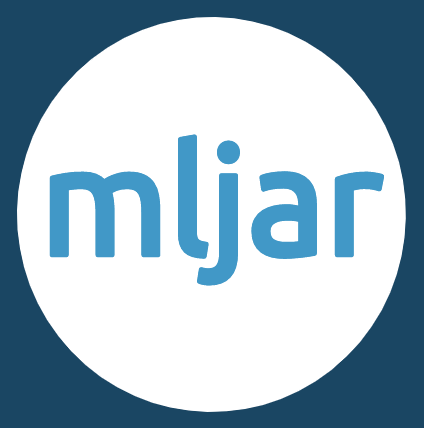

[MLJAR](https://mljar.com) is an automated machine learning tool for tabular data

In [ ]:
!python3 -m pip install -q mljar-supervised
!python3 -m pip install -q graphviz --upgrade

In [ ]:
## import packages
from supervised import AutoML

In [ ]:
## run model for carbon monoxide
mljar_carbon_monoxide = AutoML(
    total_time_limit=180,
    eval_metric='rmse',
    results_path='./mljar_carbon_monoxide'
)

mljar_carbon_monoxide.fit(X=train.to_pandas(), y=target_carbon_monoxide)

In [ ]:
## check leaderboard for carbon monoxide
mljar_carbon_monoxide.get_leaderboard()

In [ ]:
## run model for benzene
mljar_benzene = AutoML(
    total_time_limit=180,
    eval_metric='rmse',
    results_path='./mljar_benzene'
)

mljar_benzene.fit(X=train.to_pandas(), y=target_benzene)

In [ ]:
## check leaderboard for benzene
mljar_benzene.get_leaderboard()

In [ ]:
## run model for nitrogen oxides
mljar_nitrogen_oxides = AutoML(
    total_time_limit=180,
    eval_metric='rmse',
    results_path='./mljar_nitrogen_oxides'
)

mljar_nitrogen_oxides.fit(X=train.to_pandas(), y=target_nitrogen_oxides)

In [ ]:
## check leaderboard for nitrogen oxides
mljar_nitrogen_oxides.get_leaderboard()

In [ ]:
## generate predictions
preds_mljar_carbon_monoxide = dt.Frame(mljar_carbon_monoxide.predict(test.to_pandas()))
preds_mljar_benzene = dt.Frame(mljar_benzene.predict(test.to_pandas()))
preds_mljar_nitrogen_oxides = dt.Frame(mljar_nitrogen_oxides.predict(test.to_pandas()))

In [ ]:
## create submission
submission = dt.Frame(
    date_time=test_date_time,
    target_carbon_monoxide=preds_mljar_carbon_monoxide,
    target_benzene=preds_mljar_benzene,
    target_nitrogen_oxides=preds_mljar_nitrogen_oxides
)

submission.head()

In [ ]:
## save submission
submission.to_csv(PATH_MLJAR_SUBMISSION)

In [ ]:
## clear memory
shutil.rmtree('mljar_carbon_monoxide')
shutil.rmtree('mljar_benzene')
shutil.rmtree('mljar_nitrogen_oxides')

del mljar_carbon_monoxide
del mljar_benzene
del mljar_nitrogen_oxides

gc.collect()

This is just a baseline submission over which a lot of improvement can be made. You can read more about MLJAR's workflow, settings, hyperparameters, interpretability and more here:

* [Documentation of MLJAR](https://supervised.mljar.com)

## TPOT
<img src='https://raw.githubusercontent.com/EpistasisLab/tpot/master/images/tpot-logo.jpg' width='150px'>

[TPOT](http://epistasislab.github.io/tpot) is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming

In [ ]:
## import packages
from tpot import TPOTRegressor
from sklearn.metrics import make_scorer, mean_squared_log_error

In [ ]:
## run model for carbon monoxide
msle = make_scorer(mean_squared_log_error, greater_is_better=False)

tpot_carbon_monoxide = TPOTRegressor(
    max_time_mins=3,
    scoring=msle
)

tpot_carbon_monoxide.fit(features=train.to_pandas(), target=target_carbon_monoxide)

In [ ]:
## check pipeline for carbon monoxide
print(tpot_carbon_monoxide.fitted_pipeline_)

In [ ]:
## run model for benzene
msle = make_scorer(mean_squared_log_error, greater_is_better=False)

tpot_benzene = TPOTRegressor(
    max_time_mins=3,
    scoring=msle
)

tpot_benzene.fit(features=train.to_pandas(), target=target_benzene)

In [ ]:
## check pipeline for benzene
print(tpot_benzene.fitted_pipeline_)

In [ ]:
## run model for nitrogen oxides
msle = make_scorer(mean_squared_log_error, greater_is_better=False)

tpot_nitrogen_oxides = TPOTRegressor(
    max_time_mins=3,
    scoring=msle
)

tpot_nitrogen_oxides.fit(features=train.to_pandas(), target=target_nitrogen_oxides)

In [ ]:
## check pipeline for benzene
print(tpot_nitrogen_oxides.fitted_pipeline_)

In [ ]:
## generate predictions
preds_tpot_carbon_monoxide = dt.Frame(tpot_carbon_monoxide.predict(test.to_pandas()))
preds_tpot_benzene = dt.Frame(tpot_benzene.predict(test.to_pandas()))
preds_tpot_nitrogen_oxides = dt.Frame(tpot_nitrogen_oxides.predict(test.to_pandas()))

In [ ]:
## create submission
submission = dt.Frame(
    date_time=test_date_time,
    target_carbon_monoxide=preds_tpot_carbon_monoxide,
    target_benzene=preds_tpot_benzene,
    target_nitrogen_oxides=preds_tpot_nitrogen_oxides
)

submission.head()

In [ ]:
## save submission
submission.to_csv(PATH_TPOT_SUBMISSION)

In [ ]:
## clear memory
del tpot_carbon_monoxide
del tpot_benzene
del tpot_nitrogen_oxides

gc.collect()

This is just a baseline submission over which a lot of improvements can be made. You can read more about TPOT's workflow, settings, hyperparameters, optimizations and more here:

* [Documentation of TPOT](http://epistasislab.github.io/tpot)

## Similar Tutorials
Similar tutorials on other Kaggle TPS competitions are published here:

* [AutoML Tutorial: TPS (January 2021)](https://www.kaggle.com/rohanrao/automl-tutorial-tps-january-2021)
* [AutoML Tutorial: TPS (February 2021)](https://www.kaggle.com/rohanrao/automl-tutorial-tps-february-2021)
* [AutoML Tutorial: TPS (March 2021)](https://www.kaggle.com/rohanrao/automl-tutorial-tps-march-2021)
* [AutoML Tutorial: TPS (April 2021)](https://www.kaggle.com/rohanrao/automl-tutorial-tps-april-2021)
* [AutoML Tutorial: TPS (May 2021)](https://www.kaggle.com/rohanrao/automl-tutorial-tps-may-2021)
* [AutoML Tutorial: TPS (June 2021)](https://www.kaggle.com/rohanrao/automl-tutorial-tps-june-2021)